# Анализ модели

In [1]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import physics as ph
from Sun import SSM18 as s

Physics version 1.2
SSM18 version 1.7 4.07.2020


In [3]:
def load_model(epoch):
    filename = 'FromCenter/1epoch%.02d.csv' % epoch
    return pd.read_csv(filename)

In [4]:
epoch = 0
df = load_model(epoch)

In [5]:
df

,Unnamed: 0,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Convection,Pressure,Velocity
0,0,0.000000e+00,0.000000e+00,1.333000e+07,94.554471,0.000000e+00,0.732,1.318613,0.0,1.730205e+17,8.561869e-11
1,1,1.335360e+26,6.960000e+07,1.333000e+07,94.554471,1.634396e+27,0.732,1.318613,1.0,1.730205e+17,8.561869e-11
2,2,1.735967e+26,7.656000e+07,1.332997e+07,94.554040,2.124711e+27,0.732,1.318620,0.0,1.730193e+17,8.561741e-11
3,3,2.220700e+26,8.352000e+07,1.332993e+07,94.553578,2.717979e+27,0.732,1.318627,0.0,1.730180e+17,8.561603e-11
4,4,2.797568e+26,9.048000e+07,1.332990e+07,94.553080,3.424001e+27,0.732,1.318634,0.0,1.730166e+17,8.561455e-11
...,...,...,...,...,...,...,...,...,...,...,...
13995,13995,1.989737e+33,6.262796e+10,5.465099e+03,0.000031,2.461129e+33,0.732,0.003113,0.0,2.349260e+07,4.899800e-49
13996,13996,1.989737e+33,6.262800e+10,5.460450e+03,0.000031,2.461129e+33,0.732,0.003109,0.0,2.344258e+07,4.849587e-49
13997,13997,1.989737e+33,6.262805e+10,5.455801e+03,0.000031,2.461129e+33,0.732,0.003105,0.0,2.339263e+07,4.799847e-49
13998,13998,1.989737e+33,6.262810e+10,5.451153e+03,0.000031,2.461129e+33,0.732,0.003101,0.0,2.334274e+07,4.750576e-49


In [6]:
x = df['Hydrogen'].values
r = df['Radius'].values
m = df['Mass'].values
t = df['Temperature'].values
d = df['Density'].values
l = df['Luminosity'].values
p = df['Pressure'].values
k = df['Opacity'].values
c = df['Convection'].values

In [7]:
r1 = r[::70]/s.R
m1 = m[::70]/s.M

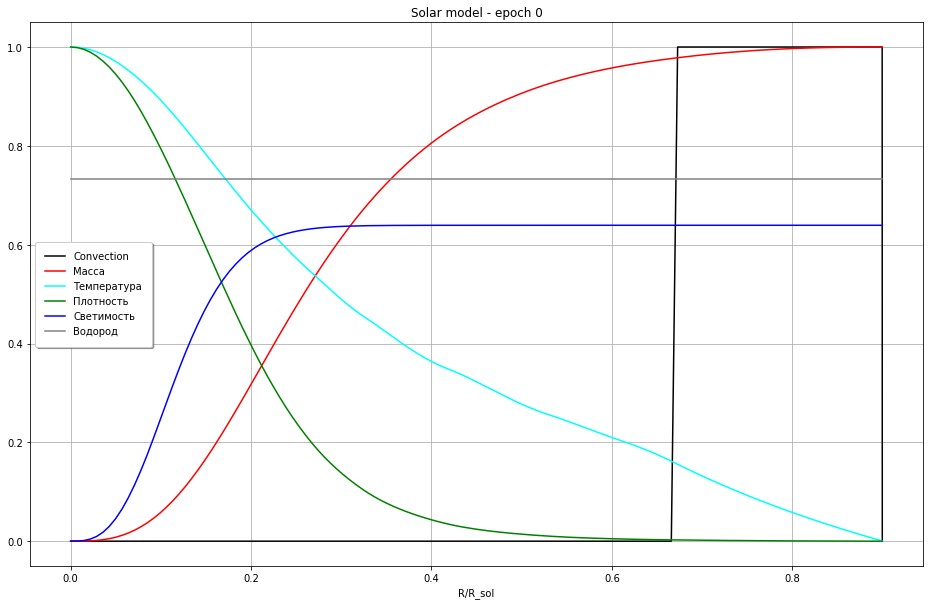

In [8]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(r1, c[::70], color='black', label='Convection')
plt.plot(r1, m[::70]/s.M, color='red', label='Масса')
plt.plot(r1, t[::70]/t[0], color='cyan', label='Температура')
# plt.plot(r1[1:], d1[1:]/d[0], color='green', label='Плотность')
plt.plot(r1, d[::70]/d[0], color='green', label='Плотность')
plt.plot(r1, l[::70]/s.L, color='blue', label='Светимость')
plt.plot(r1, x[::70], color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

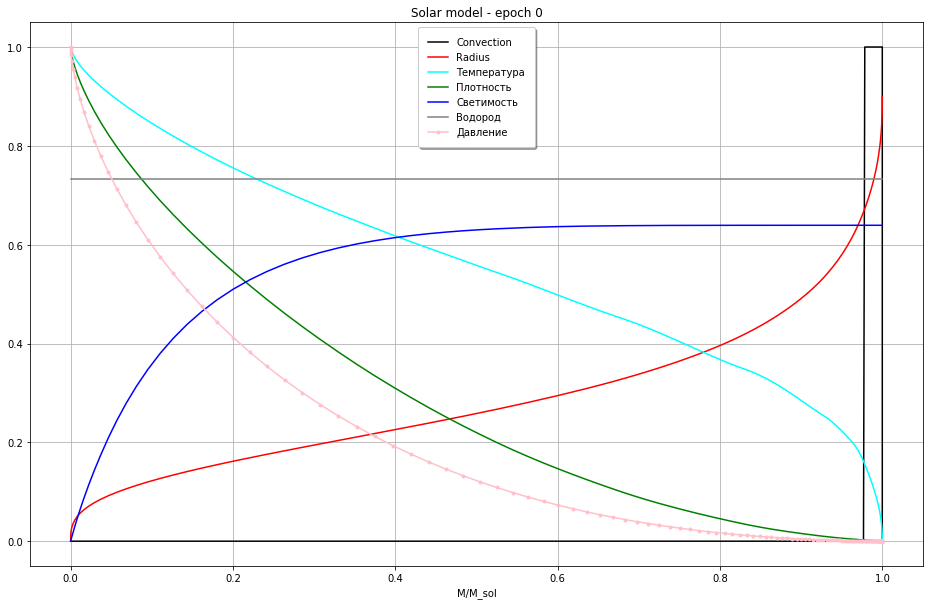

In [9]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(m1, c[::70], color='black', label='Convection')
plt.plot(m1, r1, color='red', label='Radius')
plt.plot(m1, t[::70]/t[0], color='cyan', label='Температура')
plt.plot(m1, d[::70]/d[0], color='green', label='Плотность')
plt.plot(m1, l[::70]/s.L, color='blue', label='Светимость')
plt.plot(m1, x[::70], color='gray', label='Водород')
plt.plot(m1, p[::70]/p[0], color='pink', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

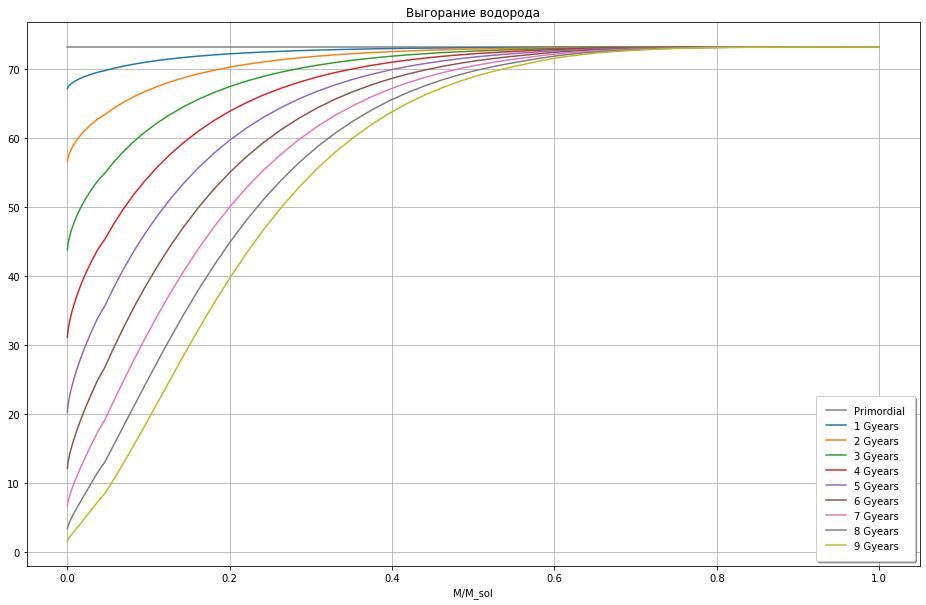

In [10]:
h = 100.*x[::70]
v = df['Velocity'].values[::70]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(m1, h, color='gray', label='Primordial')
for epoch in range(1,10):
    h = h*np.exp(-1e9*v*epoch)
    plt.plot(m1, h, label='%d Gyears' % epoch)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Выгорание водорода')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);